# LAB5 [222-15-6259]

## Load Data to the Colab


In [1]:
import pandas as pd

try:
    df_ad = pd.read_csv('advertising.csv')
    display(df_ad.head())
except FileNotFoundError as e:
    print(e)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Data Management

Shape of the DataFrame: (1000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB

Descriptive Statistics:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


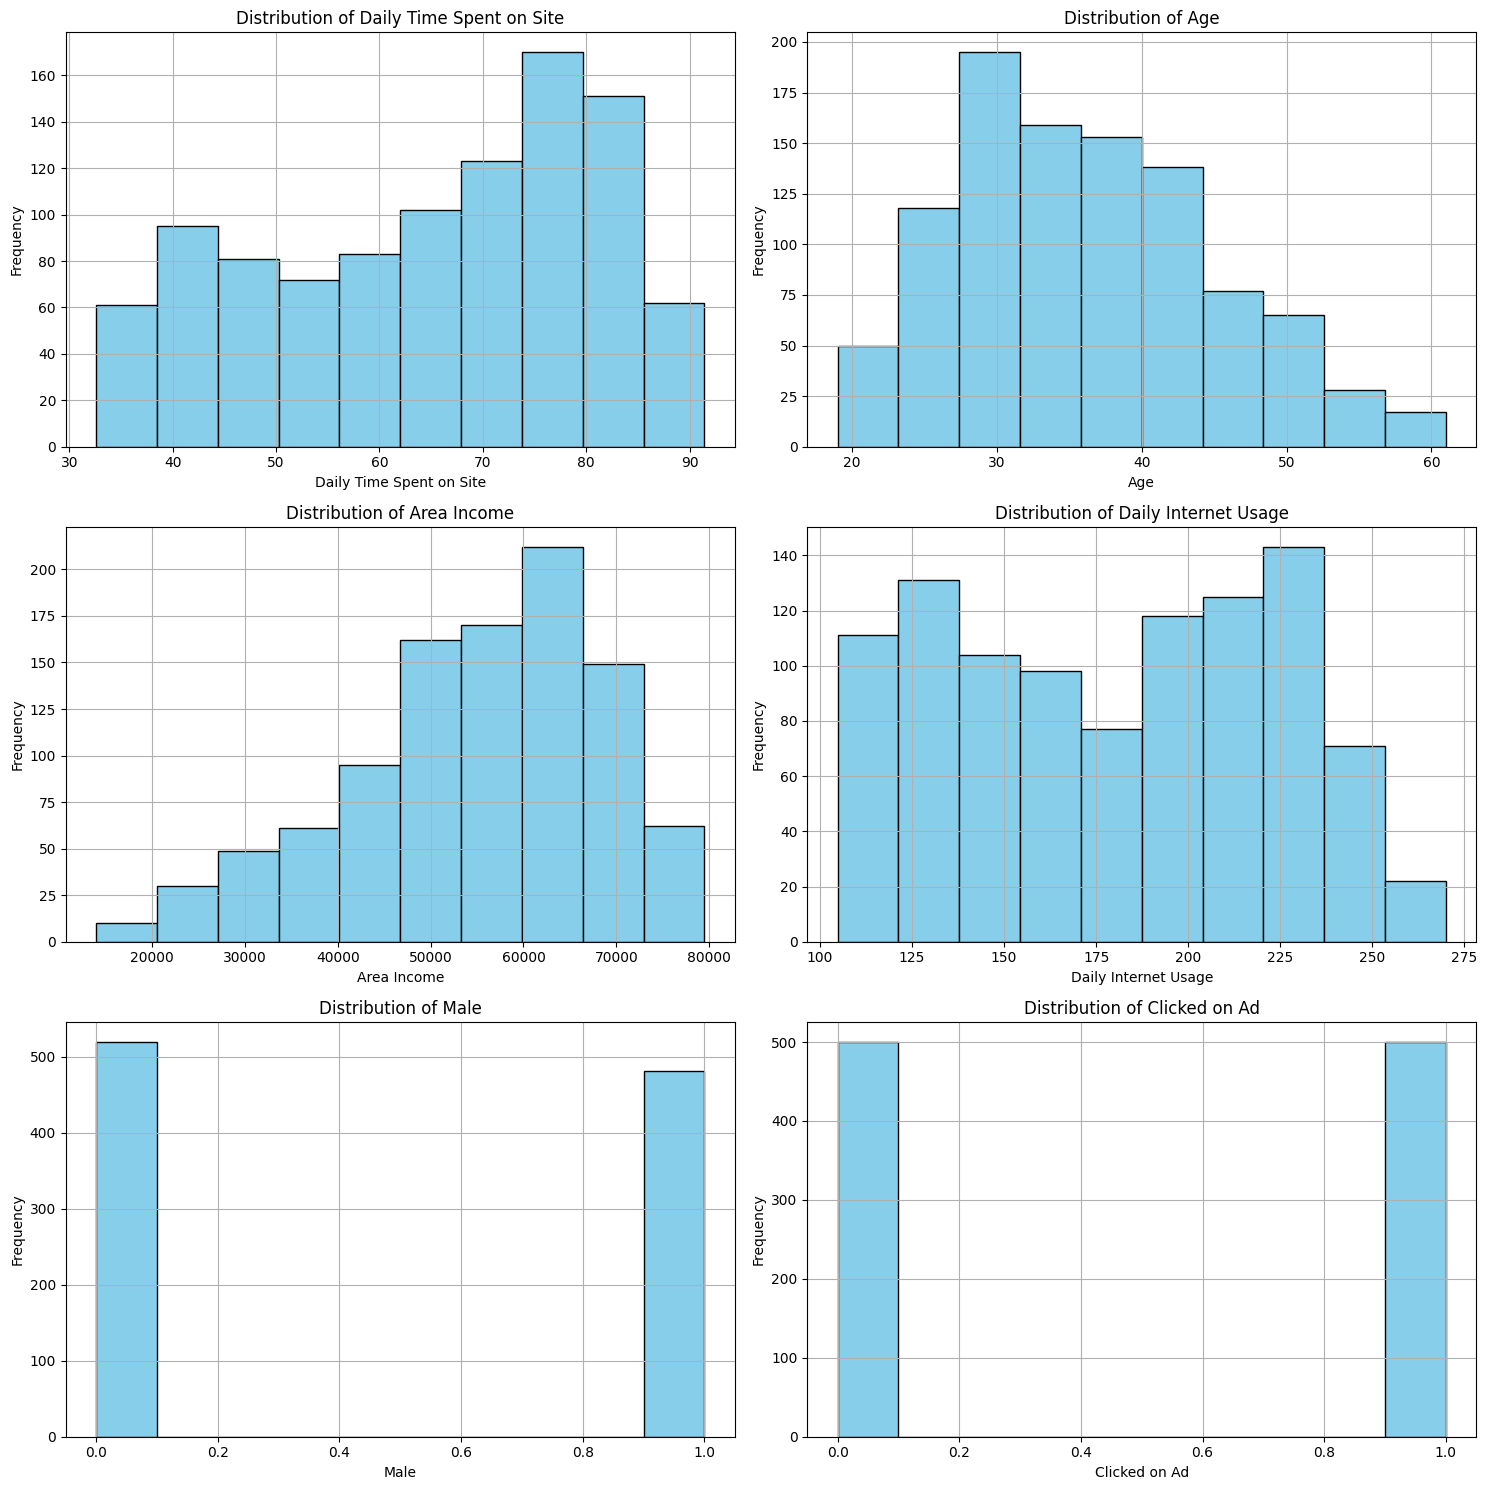


Missing Values:


,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Male,0
Country,0
Timestamp,0
Clicked on Ad,0


In [2]:
import matplotlib.pyplot as plt

# Data Shape and Info
print("Shape of the DataFrame:", df_ad.shape)
df_ad.info()

# Descriptive Statistics
print("\nDescriptive Statistics:")
display(df_ad.describe())

# Data Distribution (Histograms)
numerical_cols = df_ad.select_dtypes(include=['number']).columns
num_plots = len(numerical_cols)
fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(15, 5 * ((num_plots + 1) // 2)))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    df_ad[col].hist(ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Missing Value Analysis
print("\nMissing Values:")
display(df_ad.isnull().sum())

## Data cleaning.


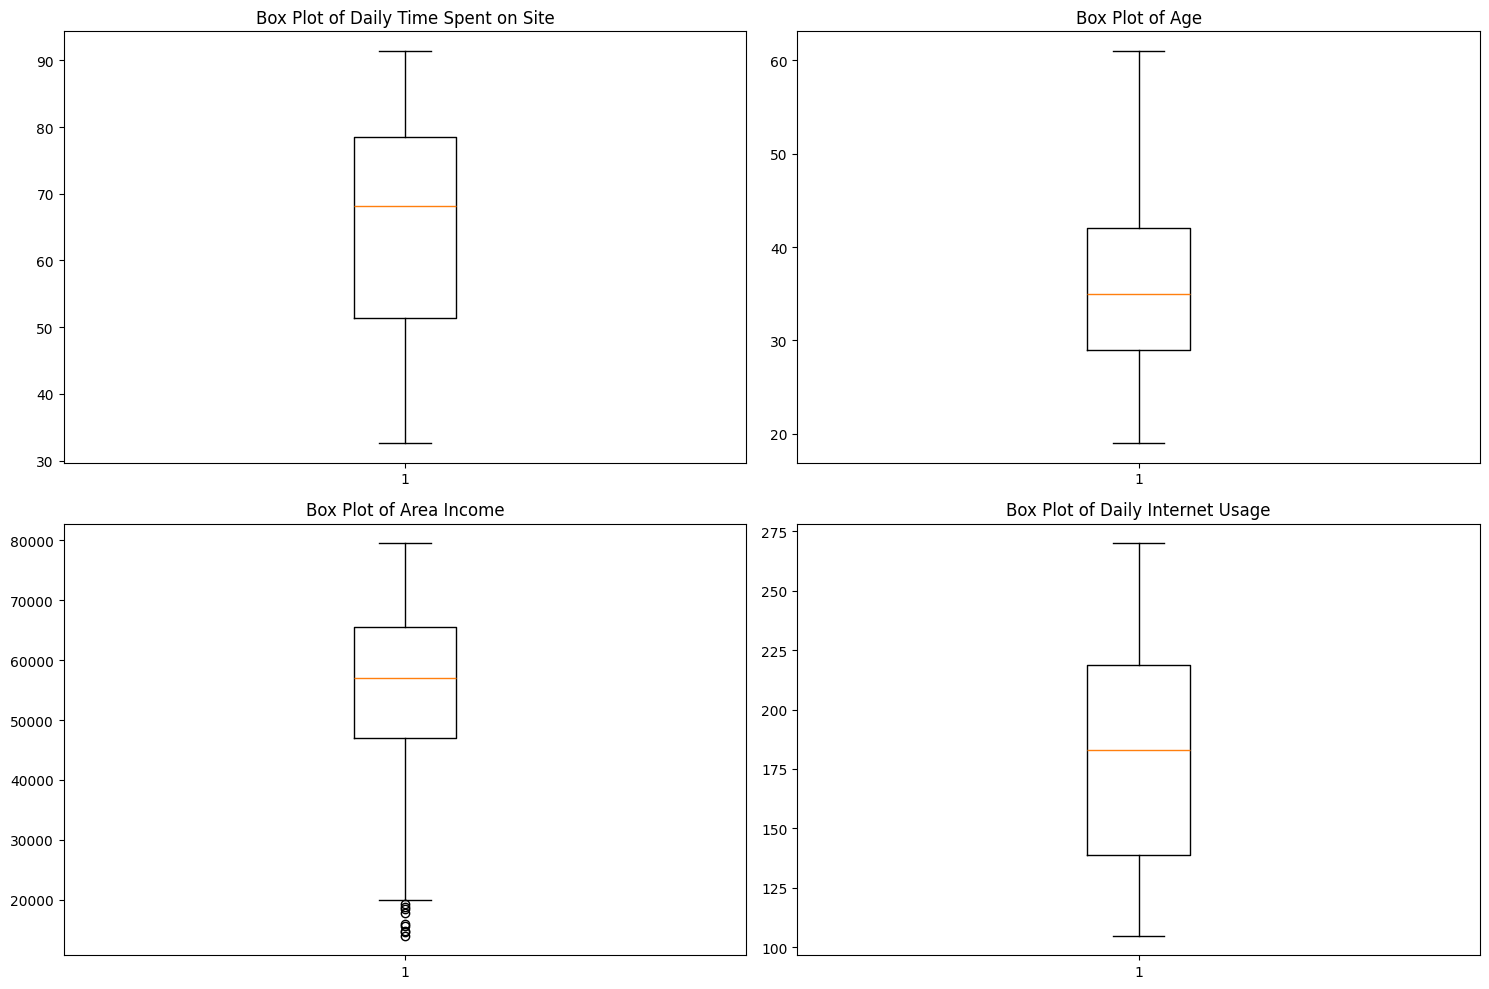

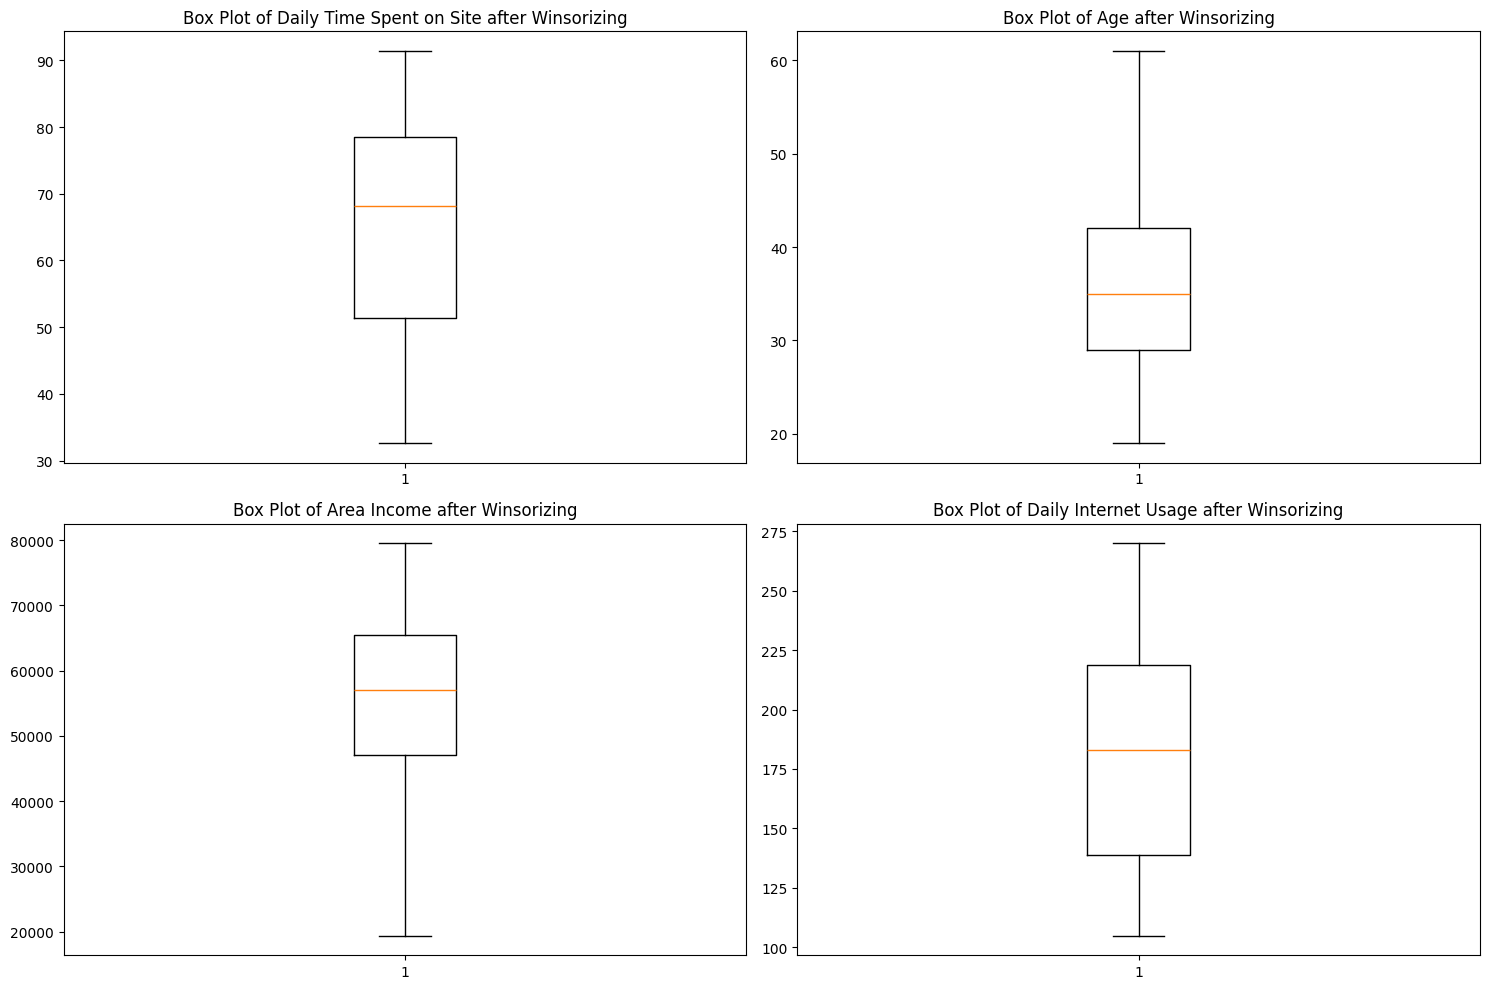

Minimum and Maximum values after Winsorizing:
Daily Time Spent on Site: Min=32.6, Max=91.43
Age: Min=19, Max=61
Area Income: Min=19373.553750000003, Max=79484.8
Daily Internet Usage: Min=104.78, Max=269.96


In [3]:
import matplotlib.pyplot as plt
import numpy as np

numerical_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Identify outliers using box plots and IQR
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df_ad[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

df_cleaned = df_ad.copy()
for col in numerical_cols:
    Q1 = df_ad[col].quantile(0.25)
    Q3 = df_ad[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorize
    df_cleaned[col] = np.clip(df_cleaned[col], lower_bound, upper_bound)

# Verify outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df_cleaned[col])
    plt.title(f'Box Plot of {col} after Winsorizing')

plt.tight_layout()
plt.show()

print("Minimum and Maximum values after Winsorizing:")
for col in numerical_cols:
    print(f"{col}: Min={df_cleaned[col].min()}, Max={df_cleaned[col].max()}")

## Data analysis



,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55025.321364,180.000100,0.481000,0.50000
std,15.853615,8.785562,13343.228619,43.902339,0.499889,0.50025
min,32.600000,19.000000,19373.553750,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.312198,0.518658,-0.748117
Age,-0.331513,1.000000,-0.182403,-0.367209,0.492531
Area Income,0.312198,-0.182403,1.000000,0.339280,-0.476905
Daily Internet Usage,0.518658,-0.367209,0.339280,1.000000,-0.786539
Clicked on Ad,-0.748117,0.492531,-0.476905,-0.786539,1.000000


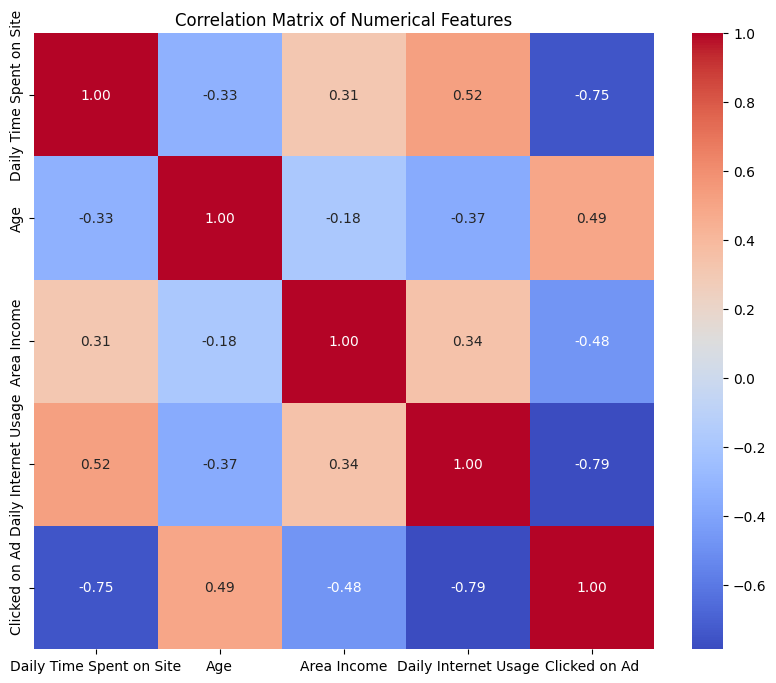

Hypothesis Test for Daily Time Spent on Site:
  T-statistic: 128.5928
  P-value: 0.0000
  There is a statistically significant relationship between Daily Time Spent on Site and sales.
Hypothesis Test for Age:
  T-statistic: 127.6045
  P-value: 0.0000
  There is a statistically significant relationship between Age and sales.
Hypothesis Test for Area Income:
  T-statistic: 130.4060
  P-value: 0.0000
  There is a statistically significant relationship between Area Income and sales.
Hypothesis Test for Daily Internet Usage:
  T-statistic: 129.2852
  P-value: 0.0000
  There is a statistically significant relationship between Daily Internet Usage and sales.

Summary of Key Findings:
1. Outlier Handling: Outliers in 'Daily Time Spent on Site', 'Age', 'Area Income', and 'Daily Internet Usage' were winsorized, with the minimum and maximum values after winsorizing reported.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Descriptive Statistics
display(df_cleaned.describe())

# 2. Correlation Matrix and Heatmap
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']
correlation_matrix = df_cleaned[numerical_features].corr()
display(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 3. Hypothesis Testing
advertising_channels = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
for channel in advertising_channels:
    t_statistic, p_value = stats.ttest_ind(df_cleaned[channel], df_cleaned['Clicked on Ad'])
    print(f"Hypothesis Test for {channel}:")
    print(f"  T-statistic: {t_statistic:.4f}")
    print(f"  P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"  There is a statistically significant relationship between {channel} and sales.")
    else:
        print(f"  There is no statistically significant relationship between {channel} and sales.")

# 4. Summarize Key Findings
print("\nSummary of Key Findings:")
print("1. Outlier Handling: Outliers in 'Daily Time Spent on Site', 'Age', 'Area Income', and 'Daily Internet Usage' were winsorized, with the minimum and maximum values after winsorizing reported.")

## Data visualization




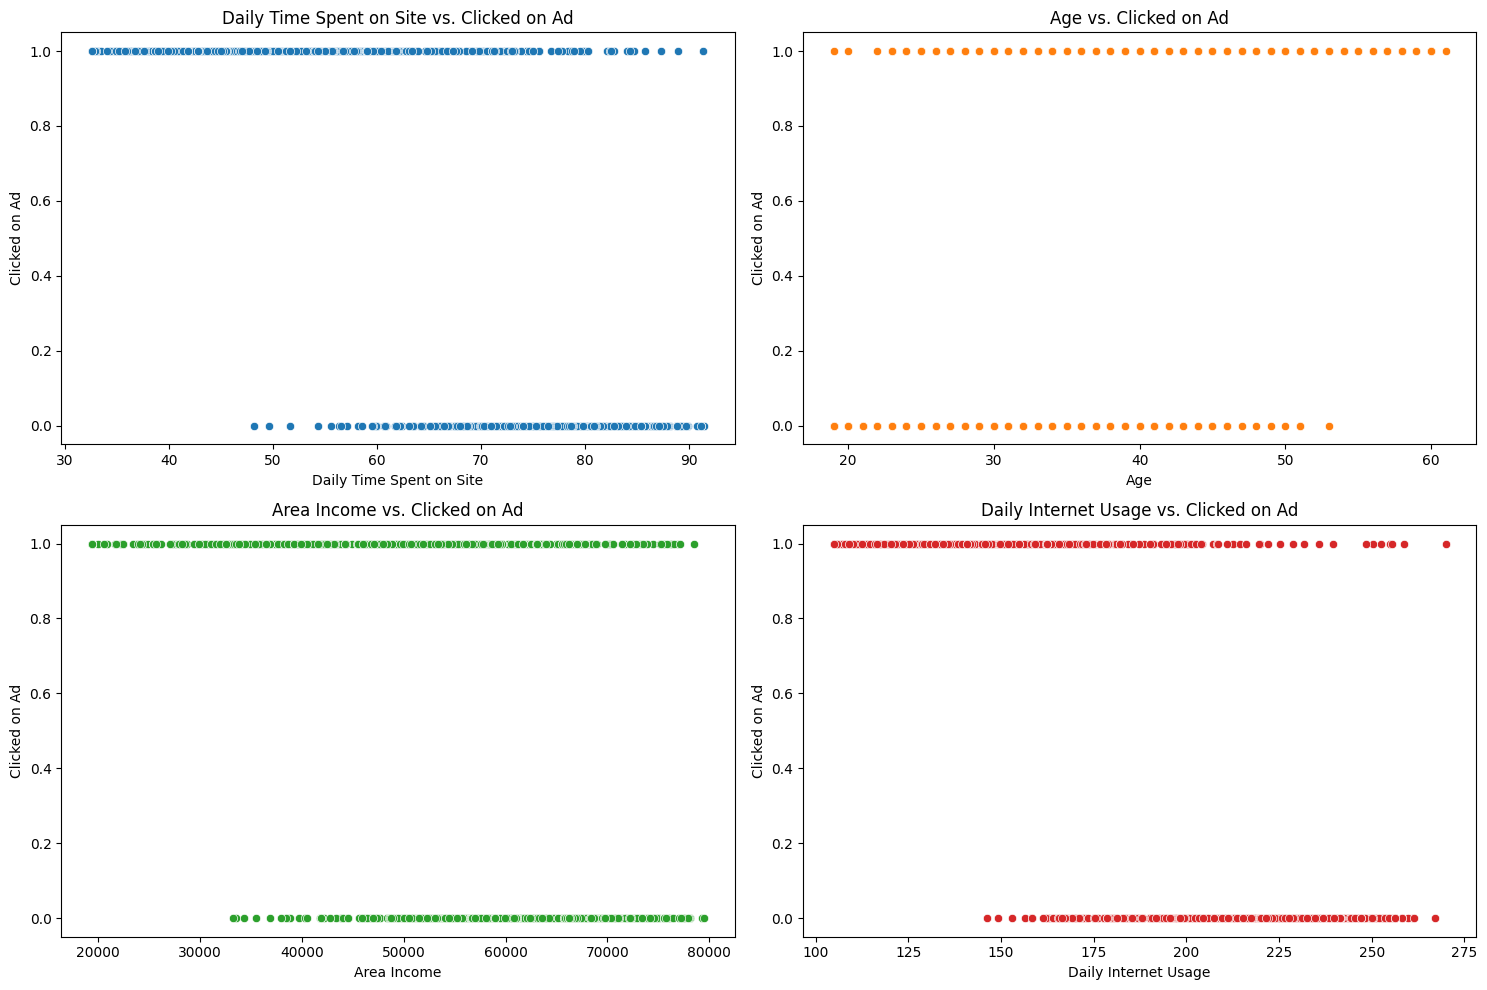

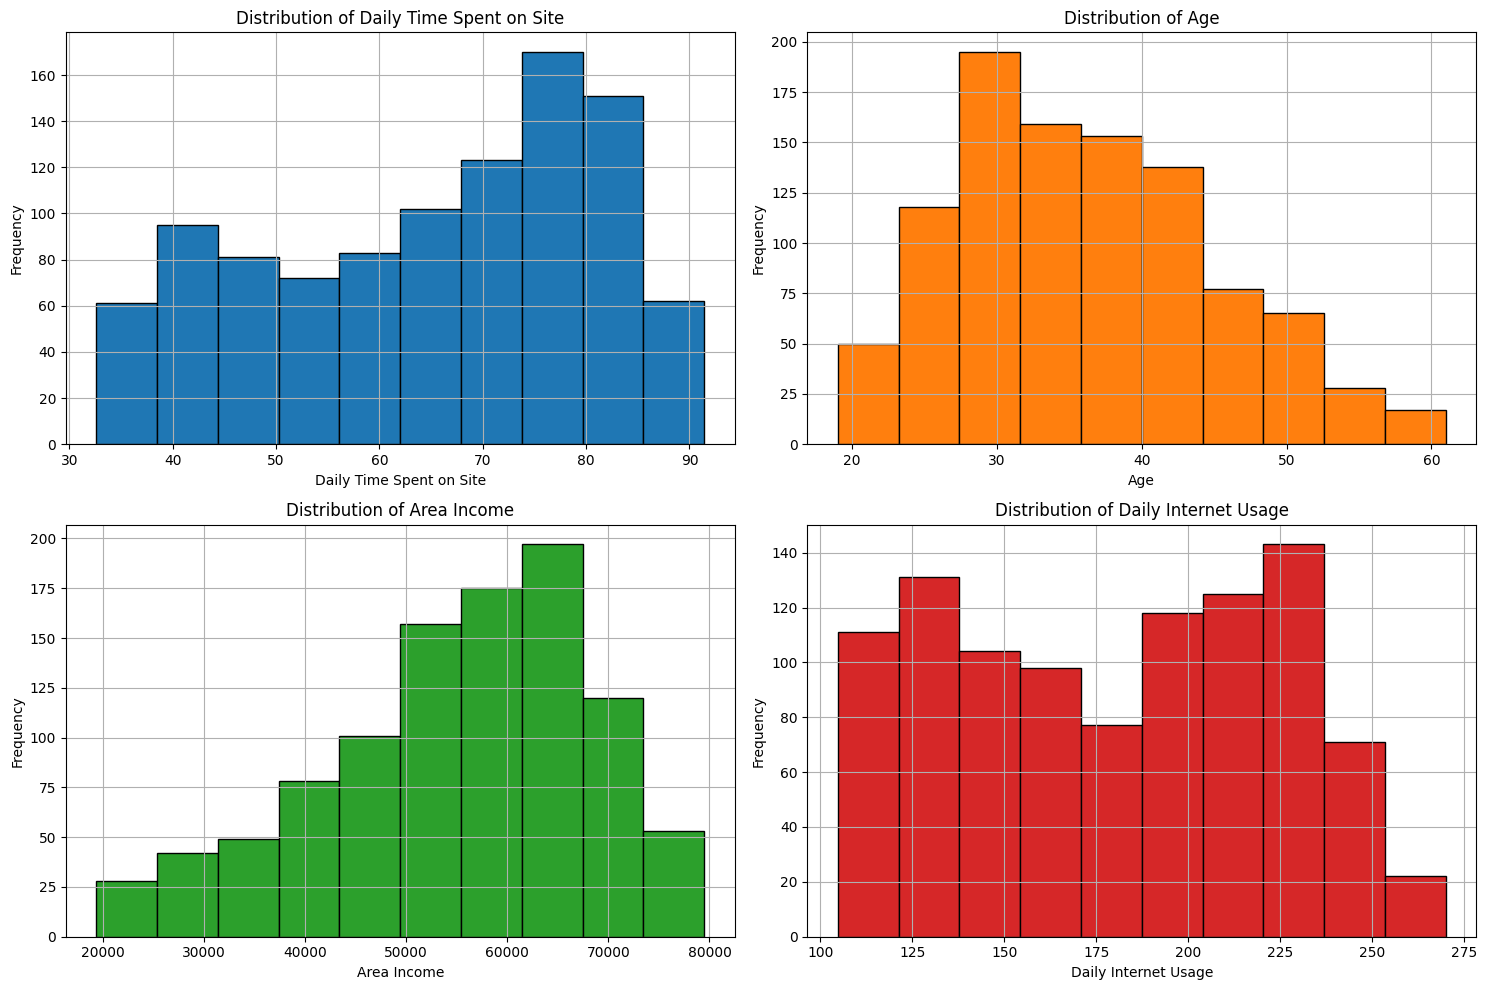

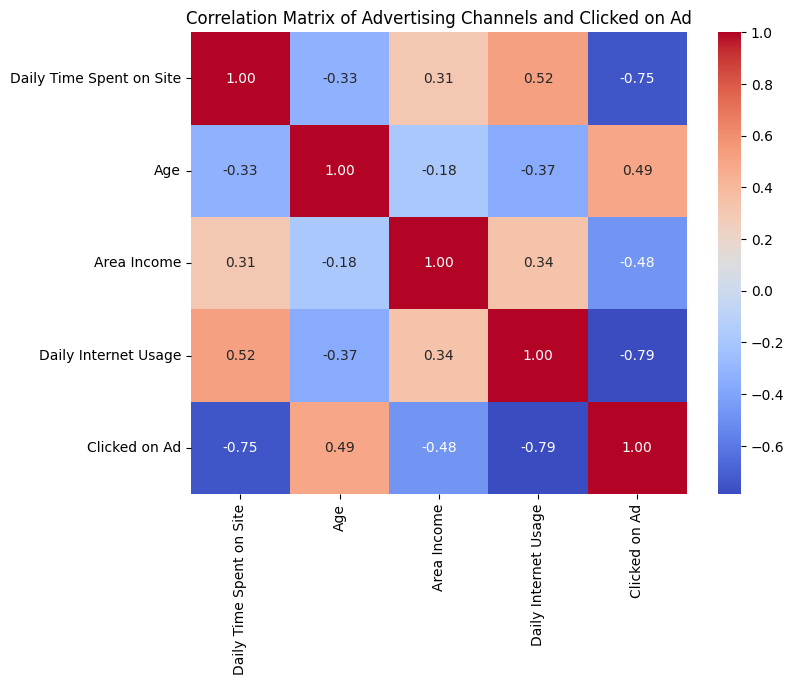

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter Plots
plt.figure(figsize=(15, 10))
advertising_channels = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
for i, channel in enumerate(advertising_channels):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=channel, y='Clicked on Ad', data=df_cleaned, color=f"C{i}")
    plt.xlabel(channel)
    plt.ylabel('Clicked on Ad')
    plt.title(f'{channel} vs. Clicked on Ad')
plt.tight_layout()
plt.show()


# 2. Histograms
plt.figure(figsize=(15, 10))
for i, channel in enumerate(advertising_channels):
    plt.subplot(2, 2, i + 1)
    df_cleaned[channel].hist(color=f"C{i}", edgecolor='black')
    plt.xlabel(channel)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {channel}')
plt.tight_layout()
plt.show()


# 3. Correlation Heatmap
correlation_matrix = df_cleaned[advertising_channels + ['Clicked on Ad']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Advertising Channels and Clicked on Ad')
plt.show()